<a href="https://colab.research.google.com/github/logolica99/ODE-Solver/blob/main/Solving_ODE_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Order ODE**

In [131]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [132]:

class Network(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='sigmoid')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, x):
        layer_out = self.hidden_layer(x)
        output = self.output_layer(layer_out)
        return output

In [133]:
N = Network()

In [134]:
def f(x):
    return tf.exp(x)

@tf.function
def loss(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = N(x)
        dy_dx = tape.gradient(y, x)

    return tf.reduce_mean(tf.square(dy_dx - f(x))) + tf.square(y[0, 0] - 1.)

Epoch 200, Loss: 0.1553


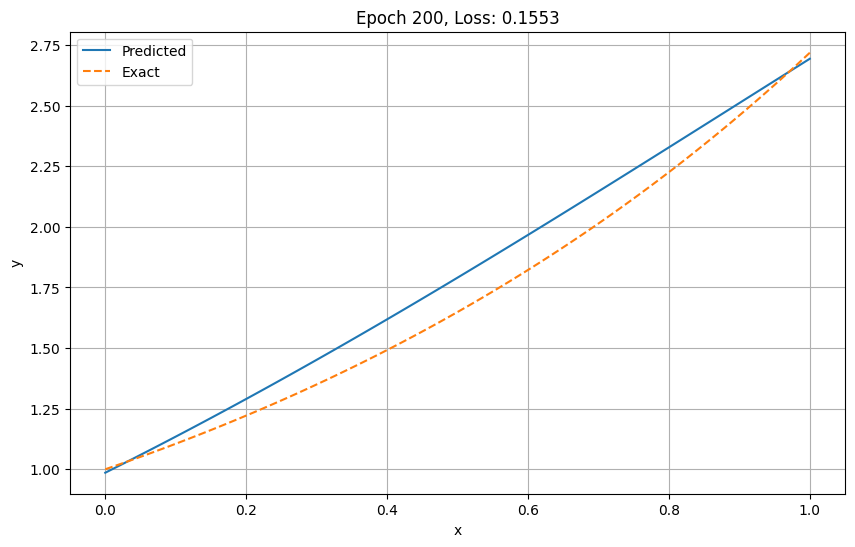

Epoch 400, Loss: 0.0188


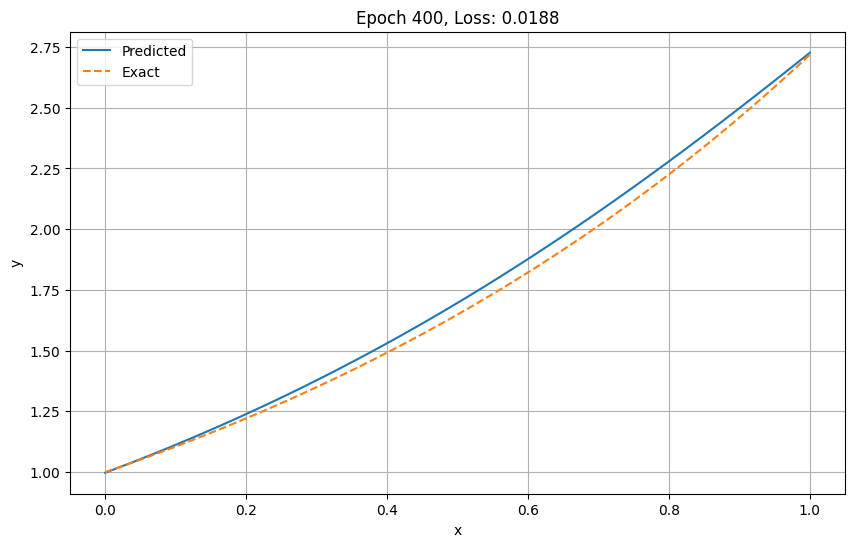

Epoch 600, Loss: 0.0026


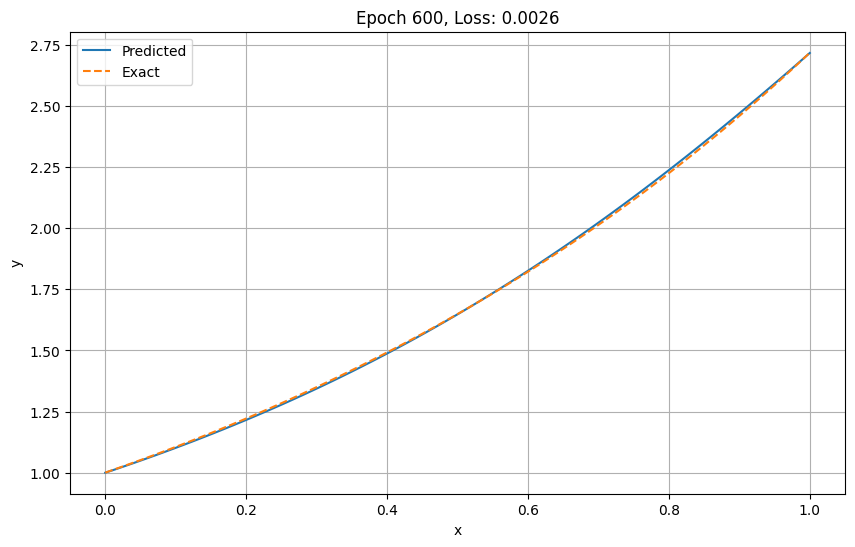

Epoch 800, Loss: 0.0015


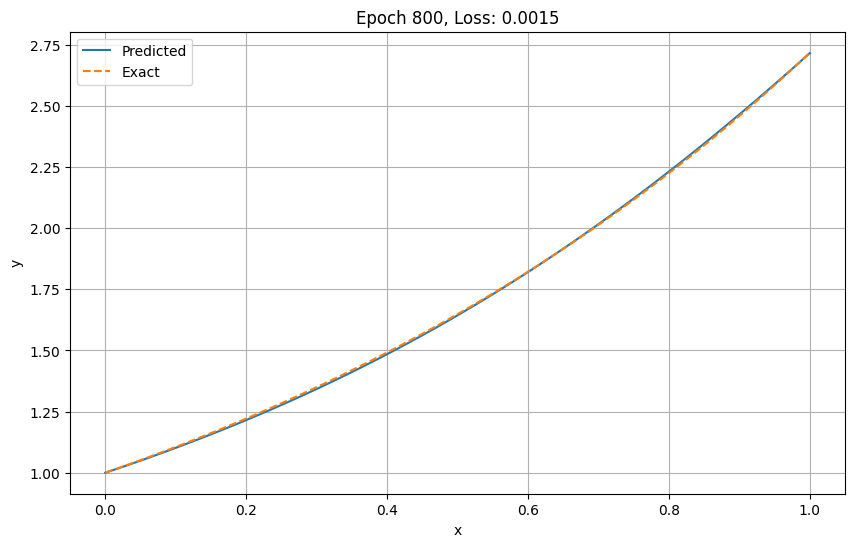

Epoch 1000, Loss: 0.0010


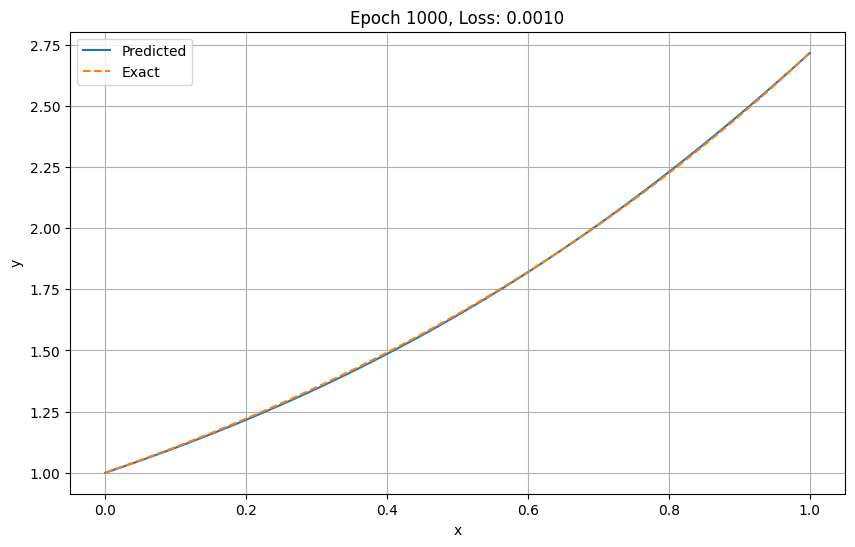

In [135]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

x = tf.linspace(0., 1., 100)[:, tf.newaxis]

@tf.function
def train_step():
    with tf.GradientTape() as tape:
        l = loss(x)
    grads = tape.gradient(l, N.trainable_variables)
    optimizer.apply_gradients(zip(grads, N.trainable_variables))
    return l

epochs = 1000
for i in range(epochs):
    l = train_step()
    if (i + 1) % 200 == 0:
        print(f"Epoch {i+1}, Loss: {l.numpy():.4f}")
        xx = tf.linspace(0., 1., 100)[:, tf.newaxis]
        yy = N(xx)
        plt.figure(figsize=(10, 6))
        plt.plot(xx, yy, label="Predicted")
        plt.plot(xx, tf.exp(xx), '--', label="Exact")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f"Epoch {i+1}, Loss: {l.numpy():.4f}")
        plt.legend()
        plt.grid()
        plt.show()



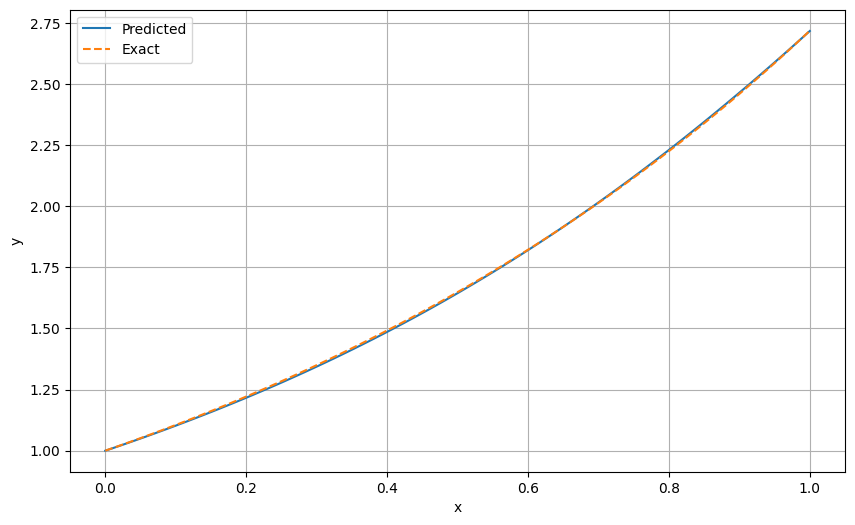

In [136]:
xx = tf.linspace(0., 1., 100)[:, tf.newaxis]
yy = N(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, tf.exp(xx), '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

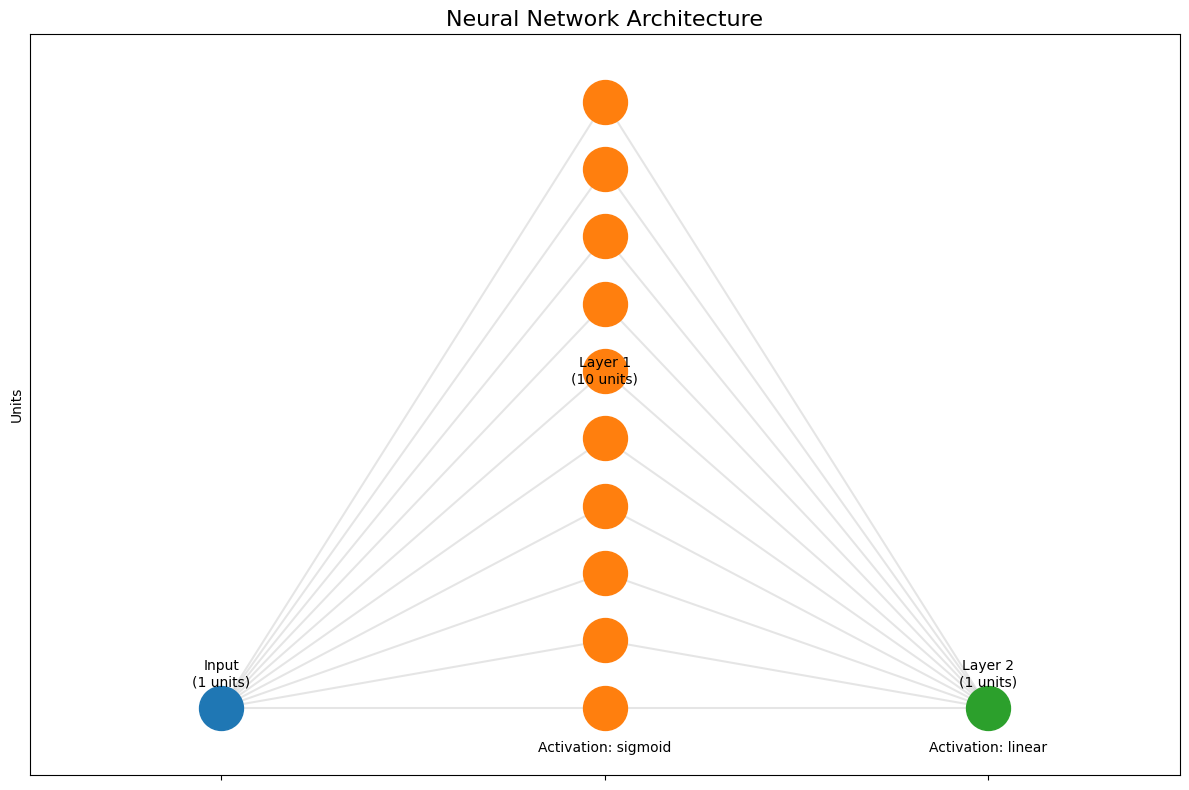

In [137]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_network_layers(model):
    # Get the number of layers
    n_layers = len(model.layers) + 1  # +1 for input layer

    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Define layer sizes (including input layer)
    layer_sizes = [1] + [layer.units for layer in model.layers]

    # Define positions for each layer
    layer_positions = np.arange(n_layers)

    # Draw nodes
    for i, size in enumerate(layer_sizes):
        layer_name = "Input" if i == 0 else f"Layer {i}"
        nodes = ax.scatter([i] * size, range(size), s=1000, zorder=2)
        ax.annotate(f"{layer_name}\n({size} units)", (i, size/2), ha='center', va='center')

    # Draw edges
    for i in range(n_layers - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                ax.plot([i, i + 1], [j, k], 'gray', alpha=0.2, zorder=1)

    # Set labels and title
    ax.set_xticks(layer_positions)
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_ylabel('Units')
    ax.set_title('Neural Network Architecture', fontsize=16)

    # Set the limits
    ax.set_xlim(-0.5, n_layers - 0.5)
    ax.set_ylim(-1, max(layer_sizes))

    # Add activation function information
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'activation'):
            activation = layer.activation.__name__
            ax.text(i + 1, -0.5, f"Activation: {activation}", ha='center', va='top')

    plt.tight_layout()
    plt.show()

# Now you can call this function with your model
draw_neural_network_layers(N)

# **Second Order ODE**

In [138]:

class Network2(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='sigmoid')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, x):
        layer_out = self.hidden_layer(x)
        output = self.output_layer(layer_out)
        return output
N2 = Network2()

In [139]:
def f2(x):
    return -tf.ones(tf.shape(x))

@tf.function
def loss2(x):

    with tf.GradientTape() as tape2:
        tape2.watch(x)
        with tf.GradientTape() as tape1:
            tape1.watch(x)
            y = N2(x)

        dy_dx = tape1.gradient(y, x)

    y_double_prime = tape2.gradient(dy_dx, x)

    boundary_loss = 0.5 * (tf.square(y[0, 0]) + tf.square(y[-1, 0]))
    return tf.reduce_mean(tf.square(y_double_prime - f2(x))) + boundary_loss


Epoch 200, Loss: 0.0386


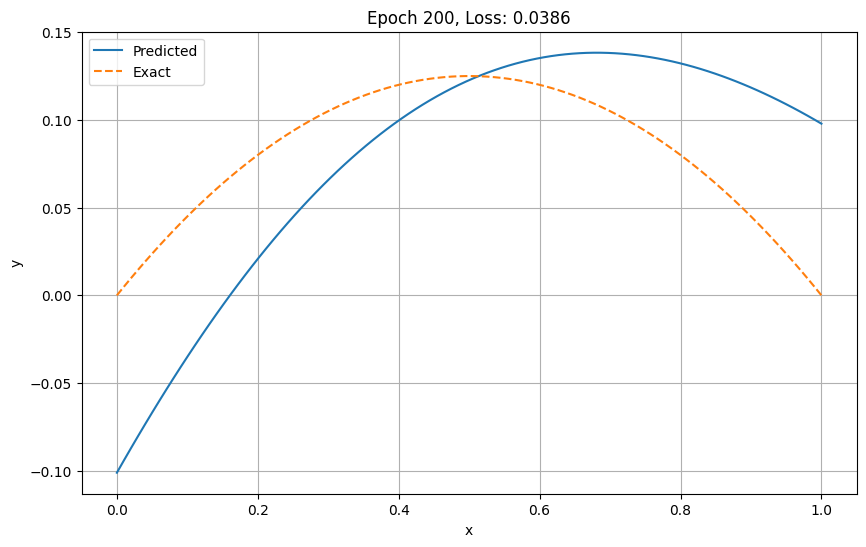

Epoch 400, Loss: 0.0115


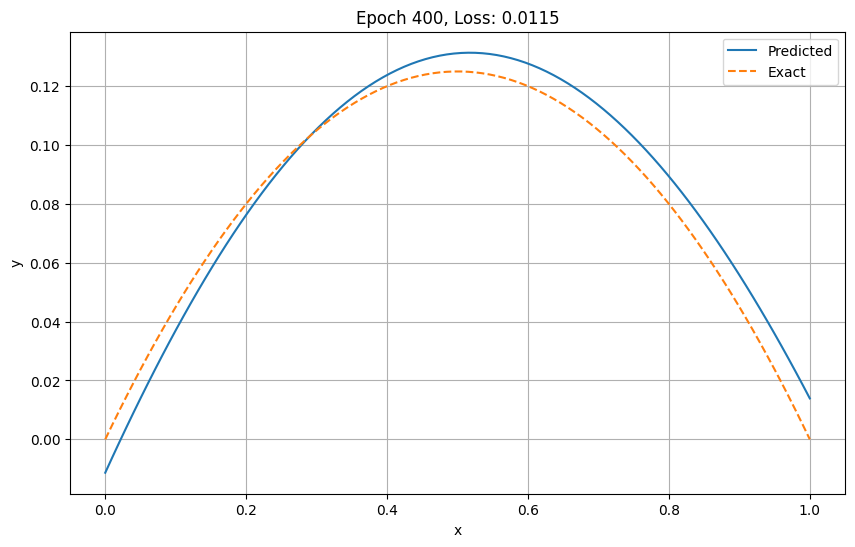

Epoch 600, Loss: 0.0071


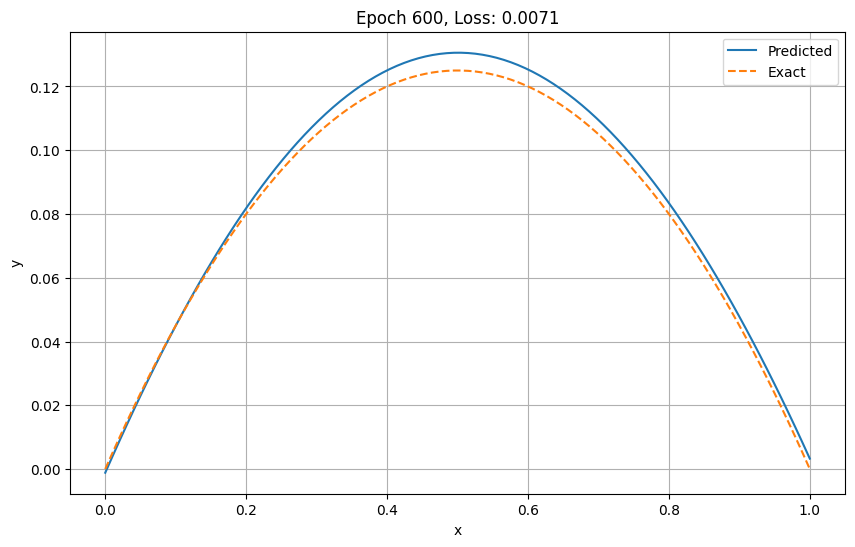

Epoch 800, Loss: 0.0047


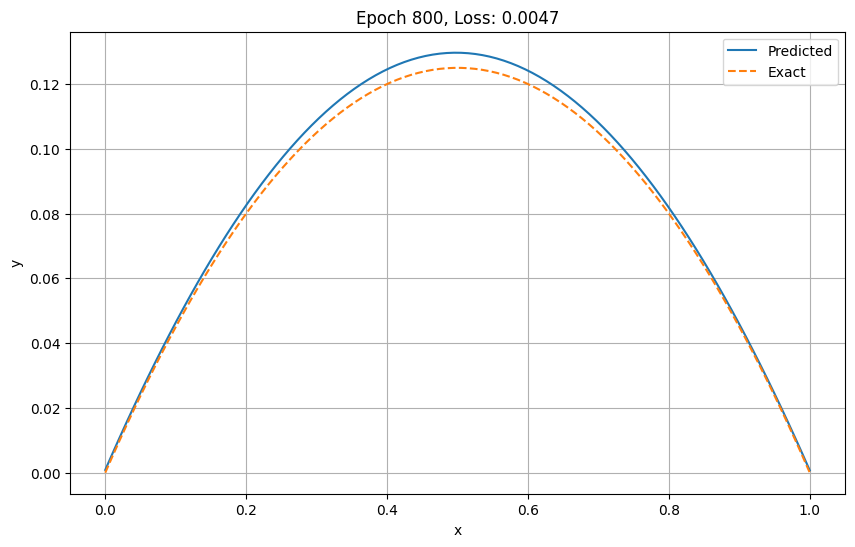

Epoch 1000, Loss: 0.0031


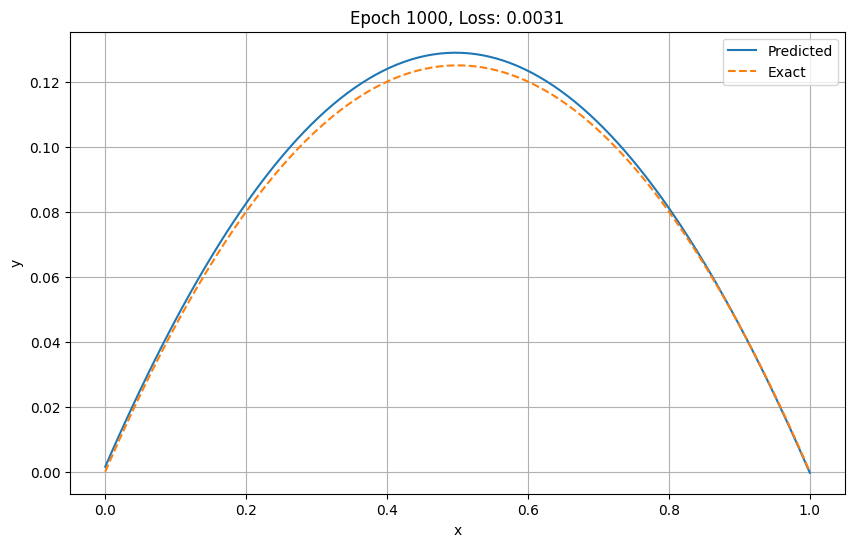

In [140]:




optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

x = tf.linspace(0., 1., 100)[:, tf.newaxis]

@tf.function
def train_step():
    with tf.GradientTape() as tape:
        l = loss2(x)

    grads = tape.gradient(l, N2.trainable_variables)
    optimizer.apply_gradients(zip(grads, N2.trainable_variables))
    return l

epochs = 1000
for i in range(epochs):
    l = train_step()
    if (i + 1) % 200 == 0:
        print(f"Epoch {i+1}, Loss: {l.numpy():.4f}")
        xx = tf.linspace(0., 1., 100)[:, tf.newaxis]
        yy = N2(xx)
        plt.figure(figsize=(10, 6))
        plt.plot(xx, yy, label="Predicted")
        plt.plot(xx,  -0.5*tf.pow(xx, 2)+0.5*xx, '--', label="Exact")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f"Epoch {i+1}, Loss: {l.numpy():.4f}")
        plt.legend()
        plt.grid()
        plt.show()

